In [25]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,adjusted_rand_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import numpy as np

In [26]:
wine = load_wine()
X = wine.data
y = wine.target


scaler = StandardScaler()
X = scaler.fit_transform(X)

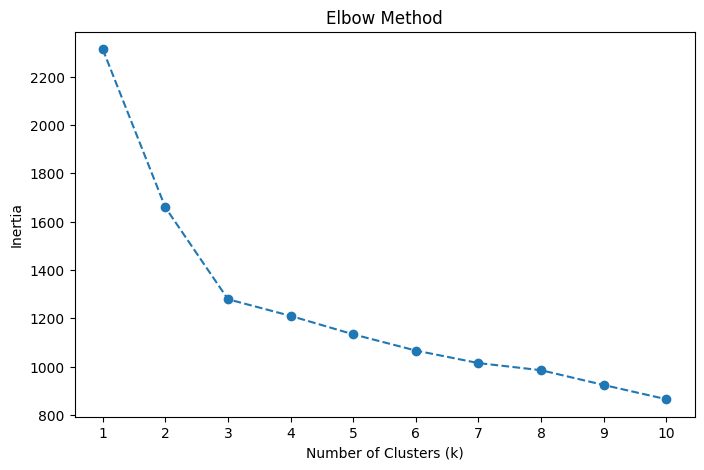

In [27]:

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)


Accuracy: 0.97
(ARI): 0.91


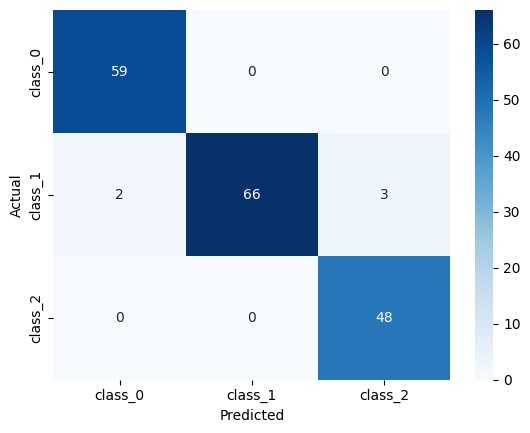

In [29]:
labels = np.zeros_like(y_pred)
for i in range(3):  
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]
    
    
accuracy = accuracy_score(y, labels)
ari = adjusted_rand_score(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")
conf_matrix = confusion_matrix(y, labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

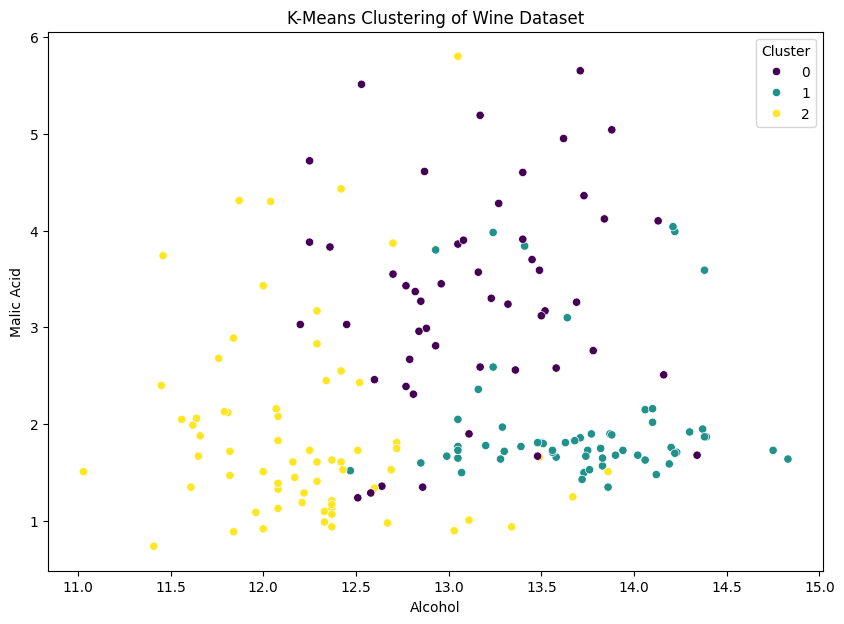

In [30]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['Cluster'] = y_pred


plt.figure(figsize=(10, 7))
sns.scatterplot(x='alcohol', y='malic_acid', hue='Cluster', palette='viridis', data=df, legend='full')
plt.title('K-Means Clustering of Wine Dataset')
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.show()